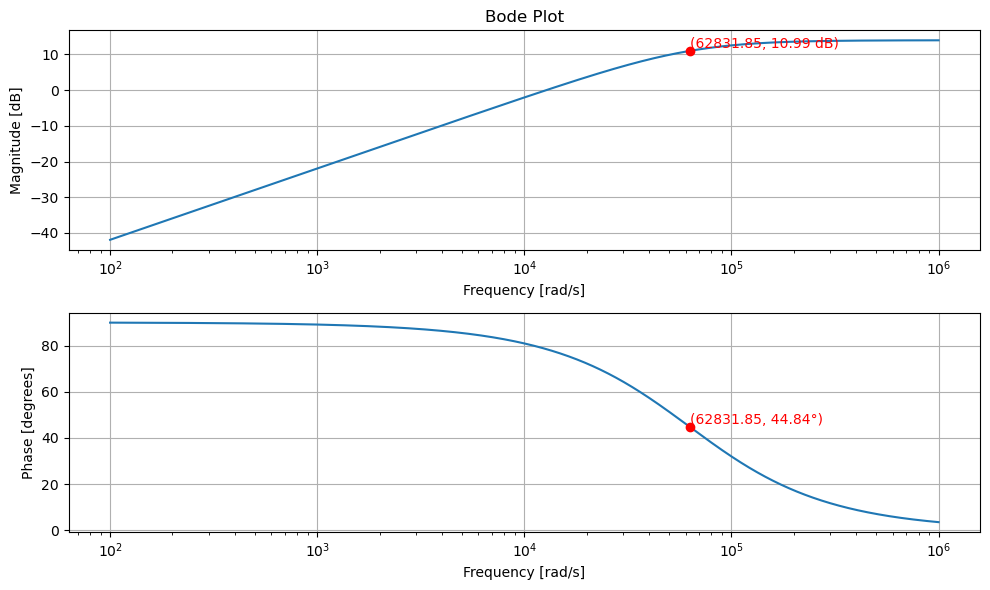

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, bode

# 给定的电路参数
R1 = 1e3      # 电阻 R1
Rf = 4e3      # 电阻 Rf
R = 1e3       # 电阻 R
C = 16e-9     # 电容 C

# 增益 Ap 和系统的自然频率 Wn
Ap = 1 + Rf / R1
Wn = 1 / (R * C)

# 定义传递函数 H(s)
numerator = [Ap, 0]       # 分子 (增益Ap 和零点)
denominator = [1, Wn]     # 分母 (一阶系统的自然频率Wn)
Hs = lti(numerator, denominator)

# 定义频率范围，这里使用对数分布的频率范围
angularFrequencies = np.logspace(2, 6, 10000)  # 频率从 10^2 到 10^6

# 计算幅频响应和相频响应
w, mag, phase = bode(Hs, angularFrequencies)

# 目标角频率 2π * 10000
target_w = 2 * np.pi * 10000

# 查找最接近目标频率的索引
index = np.abs(w - target_w).argmin()

# 获取目标频率的幅度和相位
target_mag = mag[index]
target_phase = phase[index]

# 绘制波德图
plt.figure(figsize=(10, 6))

# 绘制幅频响应图 (Magnitude)
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)  # 使用对数坐标显示频率
plt.scatter(target_w, target_mag, color='red', zorder=5)  # 在目标频率处标点
plt.text(target_w, target_mag, f'({target_w:.2f}, {target_mag:.2f} dB)', 
         horizontalalignment='left', verticalalignment='bottom', color='red')
plt.title('Bode Plot')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)

# 绘制相频响应图 (Phase)
plt.subplot(2, 1, 2)
plt.semilogx(w, phase)  # 使用对数坐标显示频率
plt.scatter(target_w, target_phase, color='red', zorder=5)  # 在目标频率处标点
plt.text(target_w, target_phase, f'({target_w:.2f}, {target_phase:.2f}°)', 
         horizontalalignment='left', verticalalignment='bottom', color='red')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.grid(True)

# 调整布局以避免图像重叠
plt.tight_layout()

# 显示图形
plt.show()


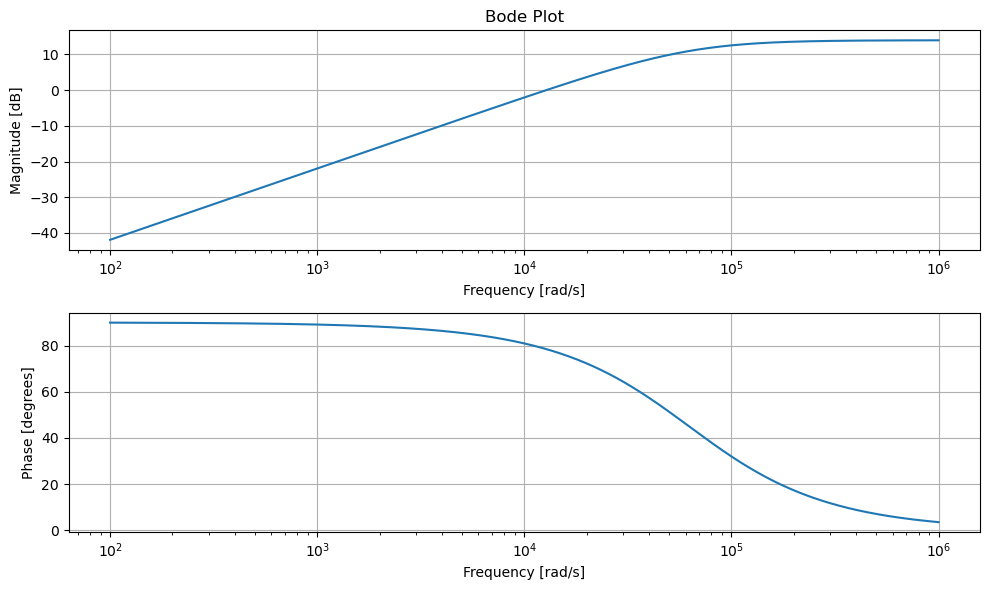

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, bode

# 给定的电路参数
R1 = 1e3      # 电阻 R1
Rf = 4e3      # 电阻 Rf
R = 1e3       # 电阻 R
C = 16e-9     # 电容 C

# 增益 Ap 和系统的自然频率 Wn
Ap = 1 + Rf / R1
Wn = 1 / (R * C)

# 定义传递函数 H(s)
numerator = [Ap, 0]       # 分子 (增益Ap 和零点)
denominator = [1, Wn]     # 分母 (一阶系统的自然频率Wn)
Hs = lti(numerator, denominator)

# 定义频率范围，这里使用对数分布的频率范围
angularFrequencies = np.logspace(2, 6, 10000)  # 频率从 10^2 到 10^6

# 计算幅频响应和相频响应
w, mag, phase = bode(Hs, angularFrequencies)

# 绘制波德图
plt.figure(figsize=(10, 6))

# 绘制幅频响应图 (Magnitude)
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)  # 使用对数坐标显示频率
plt.title('Bode Plot')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)

# 绘制相频响应图 (Phase)
plt.subplot(2, 1, 2)
plt.semilogx(w, phase)  # 使用对数坐标显示频率
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.grid(True)

# 调整布局以避免图像重叠
plt.tight_layout()

# 显示图形
plt.show()


C:\Users\tzx\AppData\Local\Temp\ipykernel_30356\4293176195.py:26: RuntimeWarning: invalid value encountered in log10
  plt.semilogx(freqs, 20 * np.log10(mag))
C:\Users\tzx\AppData\Local\Temp\ipykernel_30356\4293176195.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


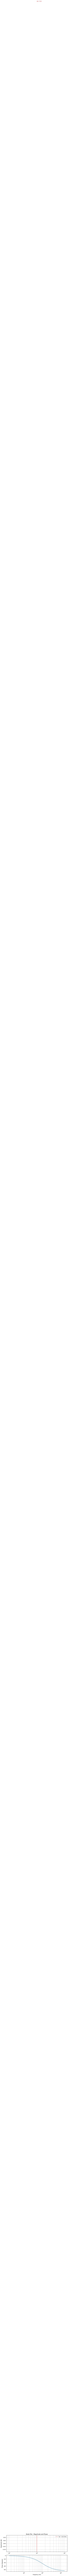

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import bode

# 参数定义
R = 1e3  # 电阻，1 kΩ
C = 16e-9  # 电容，16 nF
Rf = 5e3  # 反馈电阻，5 kΩ
Av = Rf / R  # 通带增益

# 传递函数：假设运算放大器的开环增益为无限大
num = [Rf * C]  # 分子系数
den = [R * C, 1]  # 分母系数

# 计算波特图（频率响应）
w, mag, phase = bode((num, den))

# 将角频率从 rad/s 转换为 Hz
freqs = w / (2 * np.pi)

# 绘制波特图
plt.figure(figsize=(10, 6))

# 幅度响应
plt.subplot(2, 1, 1)
plt.semilogx(freqs, 20 * np.log10(mag))
plt.title('Bode Plot - Magnitude and Phase')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which='both', linestyle='--')

# 相位响应
plt.subplot(2, 1, 2)
plt.semilogx(freqs, phase)
plt.ylabel('Phase (degrees)')
plt.xlabel('Frequency (Hz)')
plt.grid(True, which='both', linestyle='--')

# 标注截止频率和增益
# 选择一个频率点作为截止频率 (例如：10 kHz)
fp = 10e3  # 截止频率
plt.subplot(2, 1, 1)
plt.axvline(x=fp, color='r', linestyle='--', label=f'fp = {fp / 1e3} kHz')  # 截止频率竖线
plt.text(fp, 20 * np.log10(Av) + 3, f'Av = {Av:.1f}', color='red', fontsize=10)  # 放大倍数标注

# 显示图形
plt.legend(loc='best')
plt.tight_layout()
plt.show()